# Ridge Regression

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

##  Import the 'Boston.csv' data file

In [2]:
data=pd.read_csv('Boston.csv')

## Make a copy of data in 'df'

In [3]:
df=data.copy()

In [4]:
df.head()


,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating Independent and Dependent Variables

In [5]:
X =df.drop('median home price', axis=1)
Y =df[['median home price']]

print(X.shape)
print(Y.shape)


(506, 13)
(506, 1)


### Normalization

**Task 5: Normalize the data by applying MinMax Scaling on X.**

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max_scale=min_max.fit_transform(X)
x=pd.DataFrame(min_max_scale, columns=['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River',
                                             'NO2 concentration','Average Rooms/Dwelling.','Prior Built Units Proportion','Distance to Employment Centres','Radial Highways Distance','ValueProperty/tax rate','Teacher/town','blacks/town','Lower Status Percent'
])



In [7]:
x.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Train Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest =train_test_split(x,Y, test_size=0.30, random_state=0)


### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

In [10]:
ridge_regression = Ridge(alpha=0.01) 
ridge_regression

Ridge(alpha=0.01)

In [11]:
ridge_regression.fit(xtrain, ytrain)
pred = ridge_regression.predict(xtest)

In [12]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.6733317929895791

In [21]:
#!pip install yellowbrick
#!pip install -U yellowbrick

In [22]:
#conda install -c districtdatalabs yellowbrick

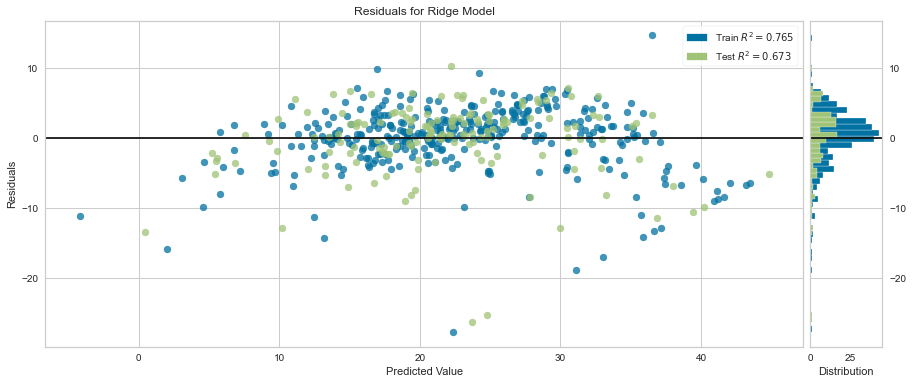

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(ridge_regression)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()

### Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso_regression = Lasso(alpha=0.001) 
lasso_regression

Lasso(alpha=0.001)

In [18]:
lasso_regression.fit(xtrain, ytrain)
pred = lasso_regression.predict(xtest)
r2_score(ytest,pred)

0.6731162467361917

### Alpha Selection Visualizer

The <mark>AlphaSelection</mark> Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. Since regularization is designed to penalize model complexity, the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). However, alphas that are too high increase the error due to bias (underfit). Therefore, it is important to choose an optimal alpha such that the error is minimized in both directions.

To do this, typically you would you use one of the <mark>"RegressionCV”</mark> models in scikit-learn. E.g. instead of using the Ridge (L2) regularizer, use RidgeCV and pass a list of alphas, which will be selected based on the cross-validation score of each alpha. This visualizer wraps a “RegressionCV” model and visualizes the alpha/error curve. If the visualization shows a jagged or random plot, then potentially the model is not sensitive to that type of regularization and another is required (e.g. L1 or Lasso regularization).

In [19]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

C:\Users\This\anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


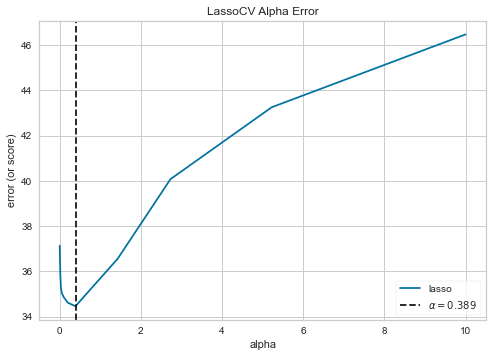

In [20]:
alphas = np.logspace(-10, 1, 40)

 
model = LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(model)

visualizer.fit(X, Y)        
g = visualizer.poof()    